# Neural Networks Lab

Building a neural network from scratch!

In [1]:
# Generate data, specifically cubic data, y= x^3 - 3x + 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x_data = np.arange(-3, 3, .1)
y_numeric = x_data ** 3 - 3 * x_data + 2
y_categorical = (y_numeric >= 2).astype(int)

# add noise (these numbers are random, but explicitly listed here so we all use the same data)
noise = np.array([ 1.20109968,  0.5143968 , -0.75046677,  0.61609437, -1.42564964,
       -0.24278509, -0.06682367, -0.07221022, -1.25231036,  0.10505861,
        0.83387709, -1.49745355,  0.39227633, -1.45015043,  1.02000935,
       -0.92474454,  1.46654345, -0.22729801, -2.68092581,  0.19022616,
        1.460804  ,  0.05054745, -0.32031863, -0.20126538,  1.45846302,
       -0.18968677,  1.1490469 , -1.13536056, -0.37933621,  1.09194987,
       -0.62442628,  1.23550369,  1.34559668, -0.40558424,  1.20431376,
        1.44755194, -0.24809615, -0.38604721,  1.07668887,  0.80339283,
       -1.03546213, -1.29254652,  2.92751962,  0.17439257, -1.40184363,
       -1.31655769, -0.32464697, -0.01413023, -1.27810733,  1.02339441,
       -1.02522028, -0.42611774, -0.37729729,  1.1996452 ,  0.79166404,
        1.20745722, -0.37161452, -0.19916778,  1.20829573,  1.28583724])

y_numeric_noisy = y_numeric + noise
y_categorical_noisy = (y_numeric_noisy >= 2).astype(int)

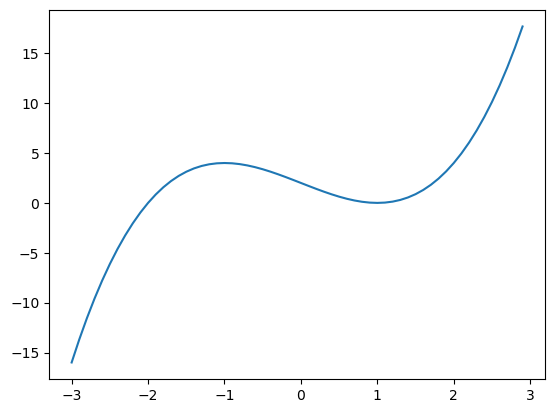

In [2]:
# Plot original data (for regression)

plt.plot(x_data, y_numeric, -3, 3)
plt.show()

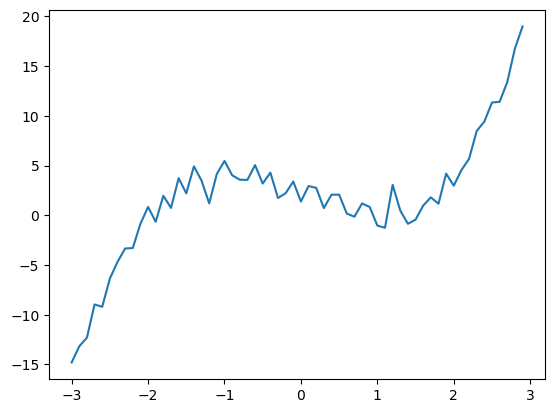

In [4]:
# Plot noisy data (for regression)

plt.plot(x_data, y_numeric_noisy, -3, 3)
plt.show()

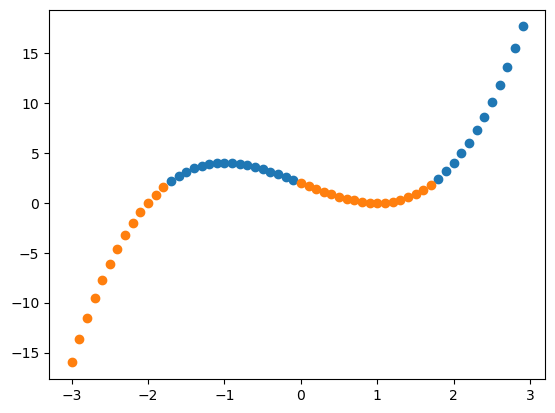

In [5]:
# Plot original data (categorical)

positives = np.array([(i, j) for i, j in zip(x_data, y_numeric) if j >= 2])
negatives = np.array([(i, j) for i, j in zip(x_data, y_numeric) if j < 2])
plt.scatter(positives[:,0], positives[:,1])
plt.scatter(negatives[:,0], negatives[:,1])
plt.show()

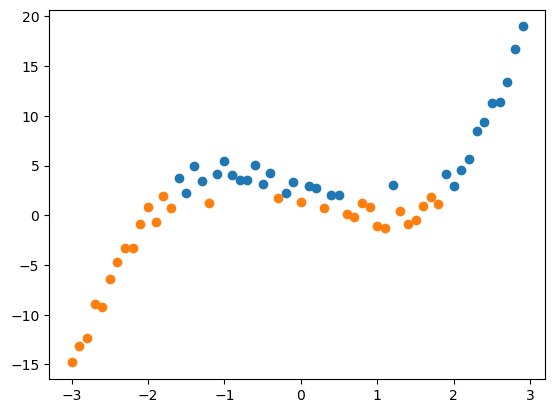

In [6]:
# Plot noisy categorical data

positives = np.array([(i, j) for i, j in zip(x_data, y_numeric_noisy) if j >= 2])
negatives = np.array([(i, j) for i, j in zip(x_data, y_numeric_noisy) if j < 2])
plt.scatter(positives[:,0], positives[:,1])
plt.scatter(negatives[:,0], negatives[:,1])
plt.show()

# Neural Network 1: Regression, no hidden layer

In [7]:
# Neural network 1, no hidden layer, regression (should duplicate linear regression)

# Activation function is identity function (not sigmoid)
# Loss function is squared error

X_train = np.array(x_data).reshape((-1, 1))
X_train = np.hstack([ np.ones((len(x_data), 1)), X_train ])
y_train = y_numeric_noisy

W = np.array([[.1, .2]])

def compute_z_vector(W, input_vector):
    return W @ input_vector

def compute_activation_vector(z_vector):
    return z_vector # identity function

def compute_loss(a, y):
    return .5 * (a - y) ** 2

def compute_cost(X_data, y_data, W):
    m = X_data.shape[0] # number of data points
    cost = 0
    
    for i in range(m):
        y_hat = make_prediction(X_data[i], W)
        y = y_data[i]
        cost += compute_loss(y_hat, y)
    total_cost = (1 / (2 * m)) * cost

    return total_cost

def augment_vector(v):
    return np.insert(v, 0, 1)

def forward_prop(W, x, **kwargs):
    # process kwargs
    verbose = kwargs['verbose'] if 'verbose' in kwargs else False
    output_only = kwargs['output_only'] if 'output_only' in kwargs else False
    
    # we assume x has the 1 in front.
    
    # set a0
    a0 = x
    if verbose: print("Input to this layer is", a0)

    # get W matrix
    if verbose: print("Using W of shape", W.shape)

    # compute z
    z1 = compute_z_vector(W, a0)
    if verbose: print("z is", z1)

    # compute activation
    a1 = compute_activation_vector(z1)
    if verbose: print("activation is", a1)
    
    if output_only:
        return a1
    else:
        return z1, a1
    
def make_prediction(x, W):
    return forward_prop(W, x, output_only=True)

def deriv_loss(a, y):
    return (a-y)

def deriv_activation(z):
    return 1

def backward_prop(W, x, y, z1, a1):
    # we assume x has the 1 in front.
    
    # compute dL/dw0 
    dL_da = deriv_loss(a1, y)
    da_dz = 1
    dz_dw0 = x[0]
    # multiply
    dL_dw0 = dL_da * da_dz * dz_dw0
    
    # compute dL/dw1 (first two pieces already done)
    dz_dw1 = x[1]
    # multiply
    dL_dw1 = dL_da * da_dz * dz_dw1
    
    return dL_dw0, dL_dw1

In [8]:
z1, a1 = forward_prop(W, X_train[0], verbose=True)

Input to this layer is [ 1. -3.]
Using W of shape (1, 2)
z is [-0.5]
activation is [-0.5]


In [9]:
compute_cost(X_train, y_train, W)

array([9.14317386])

In [10]:
backward_prop(W, X_train[0], y_train[0], z1, a1)

(array([14.29890032]), array([-42.89670096]))

In [15]:
# stochastic gradient descent:

W = np.array([[.1, .2]])
ALPHA = 0.001

J_sequence = []

print("x train is", X_train)
print("y train is", y_train)

for ctr in range(0, 100):
    print("Iteration: ", ctr)
    print("W =", W)
    print("Cost is", compute_cost(X_train, y_train, W))
    
    for i in range(X_train.shape[0]):   # m
        z1, a1 = forward_prop(W, X_train[i])
        dL_dw0, dL_dw1 = backward_prop(W, X_train[i], y_train[i], z1, a1)
        #print("Gradients", dL_dw0, dL_dw1)
        W[0][0] -= ALPHA * dL_dw0
        W[0][1] -= ALPHA * dL_dw1
        
    # "batch" gradient descent:
    #D = [0,0]
    #for i in range(X_train.shape[0]):   # m
    #    z1, a1 = forward_prop(W, X_train[i])
    #    dL_dw0, dL_dw1 = backward_prop(W, X_train[i], y_train[i], z1, a1)
    #    #print("Gradients", dL_dw0, dL_dw1)
    #    #W[0][0] -= ALPHA * dL_dw0
    #    #W[0][1] -= ALPHA * dL_dw1
    #    D[0] += dL_dw0
    #   D[1] += dL_dw1   
    #W[0][0] -= ALPHA * D[0]
    #W[0][1] -= ALPHA * D[1]
                              
    J_sequence.append(compute_cost(X_train, y_train, W))
    
print("Final W:", W)
print("Final cost:", compute_cost(X_train, y_train, W))

x train is [[ 1.00000000e+00 -3.00000000e+00]
 [ 1.00000000e+00 -2.90000000e+00]
 [ 1.00000000e+00 -2.80000000e+00]
 [ 1.00000000e+00 -2.70000000e+00]
 [ 1.00000000e+00 -2.60000000e+00]
 [ 1.00000000e+00 -2.50000000e+00]
 [ 1.00000000e+00 -2.40000000e+00]
 [ 1.00000000e+00 -2.30000000e+00]
 [ 1.00000000e+00 -2.20000000e+00]
 [ 1.00000000e+00 -2.10000000e+00]
 [ 1.00000000e+00 -2.00000000e+00]
 [ 1.00000000e+00 -1.90000000e+00]
 [ 1.00000000e+00 -1.80000000e+00]
 [ 1.00000000e+00 -1.70000000e+00]
 [ 1.00000000e+00 -1.60000000e+00]
 [ 1.00000000e+00 -1.50000000e+00]
 [ 1.00000000e+00 -1.40000000e+00]
 [ 1.00000000e+00 -1.30000000e+00]
 [ 1.00000000e+00 -1.20000000e+00]
 [ 1.00000000e+00 -1.10000000e+00]
 [ 1.00000000e+00 -1.00000000e+00]
 [ 1.00000000e+00 -9.00000000e-01]
 [ 1.00000000e+00 -8.00000000e-01]
 [ 1.00000000e+00 -7.00000000e-01]
 [ 1.00000000e+00 -6.00000000e-01]
 [ 1.00000000e+00 -5.00000000e-01]
 [ 1.00000000e+00 -4.00000000e-01]
 [ 1.00000000e+00 -3.00000000e-01]
 [ 1.0000

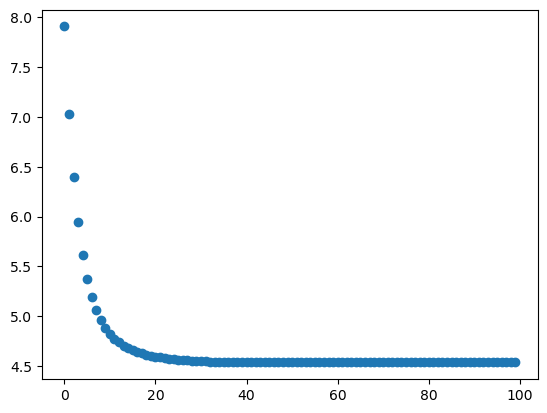

In [16]:
# Let's plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_sequence)), J_sequence)
plt.show()

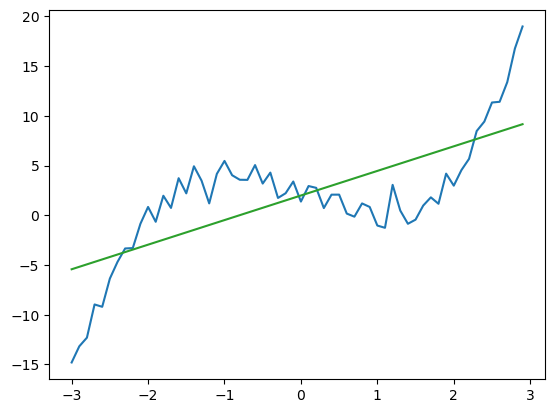

In [17]:
# Recreate original plot

y_predicted = [make_prediction([1, x], W) for x in x_data]
plt.plot(x_data, y_numeric_noisy, -3, 3)
plt.plot(x_data, y_predicted)
plt.show()

In [18]:
# Verify this matches linear regression

# Download and install scikit-learn if not already done:
%pip install scikit-learn

# Import the logistic regression functionality from scikit-learn
from sklearn.linear_model import LinearRegression

# Create a logistic regression model and train it on our training data:
model = LinearRegression(fit_intercept=False).fit(X_train, y_train)

# model.coef_ contains the w vector that this linear regression model was able to find

print("w found through scikit-learn:", model.coef_)

Note: you may need to restart the kernel to use updated packages.
w found through scikit-learn: [1.90618493 2.47770018]


# Neural network 2: Classification, no hidden layer 

In [19]:
# Neural network 2: Classification, no hidden layer (should duplicate logistic regression)

# Activation function is sigmoid
# Loss function is cross entropy

X_train = np.array(x_data).reshape((-1, 1))
X_train = np.hstack([ np.ones((len(x_data), 1)), X_train ])
y_train = y_categorical_noisy

W = np.array([[.1, .2]])

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def compute_z_vector(W, input_vector):
    return W @ input_vector

def compute_activation_vector(z_vector):
    return sigmoid(z_vector)

def compute_loss(a, y):
    if y == 0:
        return -np.log(1-a)
    else:
        return -np.log(a)

def compute_cost(X_data, y_data, W):
    m = X_data.shape[0] # number of data points
    cost = 0
    
    for i in range(m):
        y_hat = make_prediction(X_data[i], W)
        y = y_data[i]
        cost += compute_loss(y_hat, y)
    total_cost = (1 / m) * cost

    return total_cost

def augment_vector(v):
    return np.insert(v, 0, 1)

def forward_prop(W, x, **kwargs):
    # process kwargs
    verbose = kwargs['verbose'] if 'verbose' in kwargs else False
    output_only = kwargs['output_only'] if 'output_only' in kwargs else False
    
    # we assume x has the 1 in front.
    
    # set a0
    a0 = x
    if verbose: print("Input to this layer is", a0)

    # get W matrix
    if verbose: print("Using W of shape", W.shape)

    # compute z
    z1 = compute_z_vector(W, a0)
    if verbose: print("z is", z1)

    # compute activation
    a1 = compute_activation_vector(z1)
    if verbose: print("activation is", a1)
    
    if output_only:
        return a1
    else:
        return z1, a1
    
def make_prediction(x, W):
    return forward_prop(W, x, output_only=True)

def deriv_loss(a, y):
    return (a-y)/(a*(1-a))

def deriv_activation(z):
    return sigmoid(z) * (1-sigmoid(z))

def backward_prop(W, x, y, z1, a1):
    # we assume x has the 1 in front.
    
    # compute dL/dw0 
    dL_da = deriv_loss(a1, y)
    da_dz = deriv_activation(z1)
    dz_dw0 = x[0]
    # multiply
    dL_dw0 = dL_da * da_dz * dz_dw0
    
    # compute dL/dw0 (first two pieces already done)
    dz_dw1 = x[1]
    # multiply
    dL_dw1 = dL_da * da_dz * dz_dw1
    
    return dL_dw0, dL_dw1

In [20]:
z1, a1 = forward_prop(W, X_train[0], verbose=True)

Input to this layer is [ 1. -3.]
Using W of shape (1, 2)
z is [-0.5]
activation is [0.37754067]


In [21]:
compute_cost(X_train, y_train, W)

array([0.64832662])

In [22]:
backward_prop(W, X_train[0], y_train[0], z1, a1)

(array([0.37754067]), array([-1.13262201]))

In [28]:
# stochastic gradient descent:

W = np.array([[.1, .2]])
ALPHA = 0.01

J_sequence = []

print("x train is", X_train)
print("y train is", y_train)

for ctr in range(0, 100):
    print("Iteration: ", ctr)
    print("W =", W)
    print("Cost is", compute_cost(X_train, y_train, W))
    
    for i in range(X_train.shape[0]):   # m
        z1, a1 = forward_prop(W, X_train[i])
        dL_dw0, dL_dw1 = backward_prop(W, X_train[i], y_train[i], z1, a1)
        #print("Gradients", dL_dw0, dL_dw1)
        W[0][0] -= ALPHA * dL_dw0
        W[0][1] -= ALPHA * dL_dw1
                              
    J_sequence.append(compute_cost(X_train, y_train, W))
    
print("Final W:", W)
print("Final cost:", compute_cost(X_train, y_train, W))

x train is [[ 1.00000000e+00 -3.00000000e+00]
 [ 1.00000000e+00 -2.90000000e+00]
 [ 1.00000000e+00 -2.80000000e+00]
 [ 1.00000000e+00 -2.70000000e+00]
 [ 1.00000000e+00 -2.60000000e+00]
 [ 1.00000000e+00 -2.50000000e+00]
 [ 1.00000000e+00 -2.40000000e+00]
 [ 1.00000000e+00 -2.30000000e+00]
 [ 1.00000000e+00 -2.20000000e+00]
 [ 1.00000000e+00 -2.10000000e+00]
 [ 1.00000000e+00 -2.00000000e+00]
 [ 1.00000000e+00 -1.90000000e+00]
 [ 1.00000000e+00 -1.80000000e+00]
 [ 1.00000000e+00 -1.70000000e+00]
 [ 1.00000000e+00 -1.60000000e+00]
 [ 1.00000000e+00 -1.50000000e+00]
 [ 1.00000000e+00 -1.40000000e+00]
 [ 1.00000000e+00 -1.30000000e+00]
 [ 1.00000000e+00 -1.20000000e+00]
 [ 1.00000000e+00 -1.10000000e+00]
 [ 1.00000000e+00 -1.00000000e+00]
 [ 1.00000000e+00 -9.00000000e-01]
 [ 1.00000000e+00 -8.00000000e-01]
 [ 1.00000000e+00 -7.00000000e-01]
 [ 1.00000000e+00 -6.00000000e-01]
 [ 1.00000000e+00 -5.00000000e-01]
 [ 1.00000000e+00 -4.00000000e-01]
 [ 1.00000000e+00 -3.00000000e-01]
 [ 1.0000

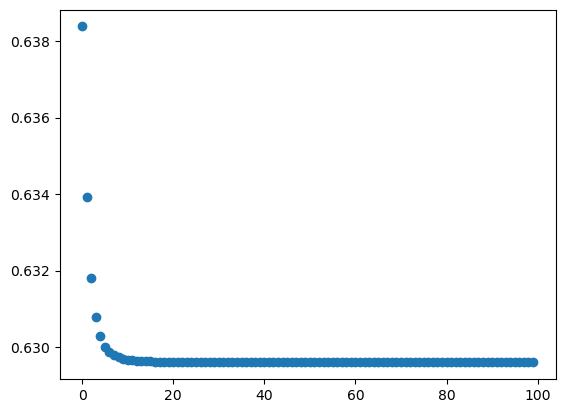

In [29]:
# Let's plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_sequence)), J_sequence)
plt.show()

In [30]:
# Download and install scikit-learn if not already done:
%pip install scikit-learn

# Import the logistic regression functionality from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model and train it on our training data:
model = LogisticRegression(random_state=0, penalty=None, fit_intercept=False).fit(X_train, y_train)

# If the line above gives an error about penalty=None, try switching that part to penalty='none' instead.

# model.coef_ contains the w vector that this logistic regression model was able to find.

print("w found through scikit-learn:", model.coef_[0])

Note: you may need to restart the kernel to use updated packages.
w found through scikit-learn: [0.02191567 0.43830831]


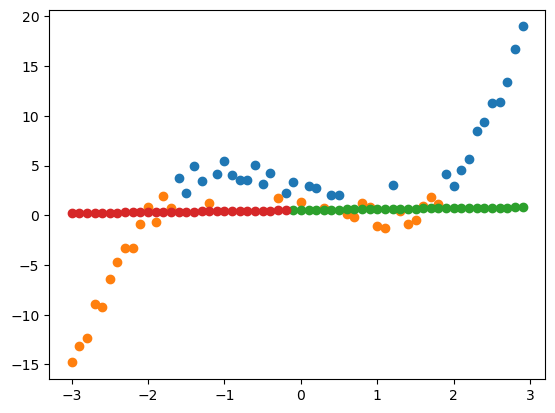

In [31]:
# Recreate original plot

positives = np.array([(i, j) for i, j in zip(x_data, y_numeric_noisy) if j >= 2])
negatives = np.array([(i, j) for i, j in zip(x_data, y_numeric_noisy) if j < 2])
plt.scatter(positives[:,0], positives[:,1])
plt.scatter(negatives[:,0], negatives[:,1])

y_predicted = [make_prediction([1, x], W) for x in x_data]
positives = np.array([(i, j[0]) for i, j in zip(x_data, y_predicted) if j >= .5])
negatives = np.array([(i, j[0]) for i, j in zip(x_data, y_predicted) if j < .5])
plt.scatter(positives[:,0], positives[:,1])
plt.scatter(negatives[:,0], negatives[:,1])

plt.show()

# Neural Network 3, 1 hidden layer with 2 neurons, regression



In [32]:
# Neural network 3, 1 hidden layer, regression

# Activation function is sigmoid for layer 1, but identity for layer 2
# Loss function is squared error

X_train = np.array(x_data).reshape((-1, 1))
X_train = np.hstack([ np.ones((len(x_data), 1)), X_train ])
y_train = y_numeric_noisy

W1 = np.array([[.1, .2], [.3, .4]])
W2 = np.array([[.5, .6, .7]])
            
def compute_z_vector(W, input_vector):
    return W @ input_vector

def compute_activation_vector(z_vector):
    return sigmoid(z_vector)

def compute_activation_vector_final(z_vector):
    return z_vector # identity function

def compute_loss(a, y):
    return .5 * (a - y) ** 2

def compute_cost(X_data, y_data, W1, W2):
    m = X_data.shape[0] # number of data points
    cost = 0
    
    for i in range(m):
        y_hat = make_prediction(X_data[i], W1, W2)
        y = y_data[i]
        cost += compute_loss(y_hat, y)
    total_cost = (1 / (2 * m)) * cost

    return total_cost

def augment_vector(v):
    return np.insert(v, 0, 1)

def forward_prop(W1, W2, x, **kwargs):
    # process kwargs
    verbose = kwargs['verbose'] if 'verbose' in kwargs else False
    output_only = kwargs['output_only'] if 'output_only' in kwargs else False
    
    # we assume x has the 1 in front.
    
    # set input1
    in1 = x
    if verbose: print("Input to layer 1 is", in1)

    # get W1 matrix
    if verbose: print("Using W1 of shape", W1.shape, W1, in1)

    # compute z
    z1 = compute_z_vector(W1, in1)
    if verbose: print("z1 is", z1)

    # compute activation
    a1 = sigmoid(z1)
    if verbose: print("a1 is", a1)
    
    # set input2
    in2 = augment_vector(a1)
    if verbose: print("Input to layer 2 is", in2)

    # get W2 matrix
    if verbose: print("Using W2 of shape", W2.shape)

    # compute z
    z2 = compute_z_vector(W2, in2)
    if verbose: print("z2 is", z2)

    # compute activation
    a2 = z2  # identity
    if verbose: print("a2 is", a2)
    
    if output_only:
        return a2
    else:
        return z1, a1, in2, z2, a2
    
def make_prediction(x, W1, W2):
    return forward_prop(W1, W2, x, output_only=True)

def deriv_loss(a, y):
    return (a-y)

def deriv_sigmoid(z):
    return sigmoid(z) * (1-sigmoid(z))

def deriv_identity(z):
    return 1

def backward_prop(W1, W2, x, y, z1, a1, in2, z2, a2):
    # we assume x has the 1 in front.
    
    # Calculations for layer 2:
    
    # compute dL/dw[2]00 
    dL_da_2_0 = deriv_loss(a2[0], y)
    da_2_0_dz_2_0 = 1
    dz_2_0_dw_2_00 = in2[0]
    # multiply
    dL_dw_2_00 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_dw_2_00
    
    # compute dL/dw[2]01  [first two terms are the same as above]
    dz_2_0_dw_2_01 = in2[1]
    # multiply
    dL_dw_2_01 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_dw_2_01
    
    # compute dL/dw[2]02  [first two terms are the same as above]
    dz_2_0_dw_2_02 = in2[2]
    # multiply
    dL_dw_2_02 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_dw_2_02
    
    ## Calcs for layer 1:
    
    # compute dL/dw[1]00  [first two terms are the same as in layer 2]
    dz_2_0_da_1_0 = W2[0][1]
    da_1_0_dz_1_0 = deriv_sigmoid(z1[0])
    dz_1_0_dw_1_00 = x[0]
    # multiply
    dL_dw_1_00 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_da_1_0 * da_1_0_dz_1_0 * dz_1_0_dw_1_00
    
    # compute dL/dw[1]01  [first four terms are the same as above]
    dz_1_0_dw_1_01 = x[1]
    # multiply
    dL_dw_1_01 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_da_1_0 * da_1_0_dz_1_0 * dz_1_0_dw_1_01
    
    # compute dL/dw[1]10  [first two terms are the same as layer 2]
    dz_2_0_da_1_1 = W2[0][2]
    da_1_1_dz_1_1 = deriv_sigmoid(z1[1])
    dz_1_1_dw_1_10 = x[0]
    # multiply
    dL_dw_1_10 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_da_1_1 * da_1_1_dz_1_1 * dz_1_1_dw_1_10
    
    # compute dL/dw[1]11  [first four terms are the same as above]
    dz_1_1_dw_1_11 = None
    # multiply
    dL_dw_1_11 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_da_1_1 * da_1_1_dz_1_1 * dz_1_1_dw_1_11
    
    # return updates to W1 and W2
    
    delta_W1 = np.array([[dL_dw_1_00, dL_dw_1_01], [dL_dw_1_10, dL_dw_1_11]])
    delta_W2 = np.array([[dL_dw_2_00, dL_dw_2_01, dL_dw_2_02]])
    return delta_W1, delta_W2
    

In [ ]:
z1, a1, in2, z2, a2 = forward_prop(W1, W2, X_train[0], verbose=True)

In [ ]:
compute_cost(X_train, y_train, W1, W2)

In [ ]:
backward_prop(W1, W2, X_train[0], y_train[0], z1, a1, in2, z2, a2)

In [ ]:
# stochastic gradient descent:

W1 = np.array([[.1, .2], [.3, .4]])
W2 = np.array([[.5, .6, .7]])
ALPHA = None

J_sequence = []

print("x train is", X_train)
print("y train is", y_train)

for ctr in range(0, 20):
    #print("Iteration: ", ctr)
    #print("W =", W1, W2)
    #print("Cost is", compute_cost(X_train, y_train, W1, W2))
    
    for i in range(X_train.shape[0]):   # m
        z1, a1, in2, z2, a2 = forward_prop(W1, W2, X_train[i])
        delta_W1, delta_W2 = backward_prop(W1, W2, X_train[i], y_train[i], z1, a1, in2, z2, a2)
        #print("Gradients", delta_W1, delta_W2)
        W1 -= ALPHA * delta_W1
        W2 -= ALPHA * delta_W2
        #J_sequence.append(compute_cost(X_train, y_train, W1, W2))
        
    #"batch" gradient descent:
    #D = [np.full_like(W1, 0),np.full_like(W2, 0)]
    #for i in range(X_train.shape[0]):   # m
    #    z1, a1, in2, z2, a2 = forward_prop(W1, W2, X_train[i])
    #    delta_W1, delta_W2 = backward_prop(W1, W2, X_train[i], y_train[i], z1, a1, in2, z2, a2)
    #    #print("Gradients", delta_W1, delta_W2)
    #    #W[0][0] -= ALPHA * dL_dw0
    #    #W[0][1] -= ALPHA * dL_dw1
    #    D[0] += delta_W1
    #    D[1] += delta_W2   
    #W1 -= ALPHA * D[0]/X_train.shape[0]
    #W2 -= ALPHA * D[1]/X_train.shape[0]
                              
    J_sequence.append(compute_cost(X_train, y_train, W1, W2))
    
print("Final W1, W2:", W1, W2)
print("Final cost:", compute_cost(X_train, y_train, W1, W2))

In [ ]:
# Let's plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_sequence)), J_sequence)
plt.show()

In [ ]:
# Recreate original plot
print(W1, W2)
y_predicted = [make_prediction([1, x], W1, W2) for x in x_data]
plt.plot(x_data, y_numeric_noisy, -3, 3)
plt.plot(x_data, y_predicted)
plt.show()

# Neural Network 4, 1 hidden layer with 2 neurons, classification

In [ ]:
# Neural network 4, 1 hidden layer, classification

# Activation function is sigmoid for layer 1 and 2
# Loss function is cross entropy

X_train = np.array(x_data).reshape((-1, 1))
X_train = np.hstack([ np.ones((len(x_data), 1)), X_train ])
y_train = y_categorical_noisy

W1 = np.array([[.1, .2], [.3, .4]])
W2 = np.array([[.5, .6, .7]])
            
def compute_z_vector(W, input_vector):
    return W @ input_vector

def compute_loss(a, y):
    if y == 0:
        return -np.log(1-a)
    else:
        return -np.log(a)

def compute_cost(X_data, y_data, W1, W2):
    m = X_data.shape[0] # number of data points
    cost = 0
    
    for i in range(m):
        y_hat = make_prediction(X_data[i], W1, W2)
        y = y_data[i]
        cost += compute_loss(y_hat, y)
    total_cost = (1 / m) * cost

    return total_cost

def augment_vector(v):
    return np.insert(v, 0, 1)

def forward_prop(W1, W2, x, **kwargs):
    # process kwargs
    verbose = kwargs['verbose'] if 'verbose' in kwargs else False
    output_only = kwargs['output_only'] if 'output_only' in kwargs else False
    
    # we assume x has the 1 in front.
    
    # set input1
    in1 = x
    if verbose: print("Input to layer 1 is", in1)

    # get W1 matrix
    if verbose: print("Using W1 of shape", W1.shape, W1, in1)

    # compute z
    z1 = compute_z_vector(W1, in1)
    if verbose: print("z1 is", z1)

    # compute activation
    a1 = sigmoid(z1)
    if verbose: print("a1 is", a1)
    
    # set input2
    in2 = augment_vector(a1)
    if verbose: print("Input to layer 2 is", in2)

    # get W2 matrix
    if verbose: print("Using W2 of shape", W2.shape)

    # compute z
    z2 = compute_z_vector(W2, in2)
    if verbose: print("z2 is", z2)

    # compute activation
    a2 = sigmoid(z2)
    if verbose: print("a2 is", a2)
    
    if output_only:
        return a2
    else:
        return z1, a1, in2, z2, a2
    
def make_prediction(x, W1, W2):
    return forward_prop(W1, W2, x, output_only=True)

def deriv_loss(a, y):
    return (a-y)/(a*(1-a))

def deriv_sigmoid(z):
    return sigmoid(z) * (1-sigmoid(z))

def deriv_identity(z):
    return 1

def backward_prop(W1, W2, x, y, z1, a1, in2, z2, a2):
    # we assume x has the 1 in front.
    
    # Calculations for layer 2:
    
    # compute dL/dw[2]00 
    dL_da_2_0 = deriv_loss(a2[0], y)
    da_2_0_dz_2_0 = deriv_sigmoid(z2[0])
    dz_2_0_dw_2_00 = in2[0]
    # multiply
    dL_dw_2_00 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_dw_2_00
    
    # compute dL/dw[2]01  [first two terms are the same as above]
    dz_2_0_dw_2_01 = in2[1]
    # multiply
    dL_dw_2_01 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_dw_2_01
    
    # compute dL/dw[2]02  [first two terms are the same as above]
    dz_2_0_dw_2_02 = in2[2]
    # multiply
    dL_dw_2_02 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_dw_2_02
    
    ## Calcs for layer 1:
    
    # compute dL/dw[1]00  [first two terms are the same as in layer 2]
    dz_2_0_da_1_0 = W2[0][1]
    da_1_0_dz_1_0 = deriv_sigmoid(z1[0])
    dz_1_0_dw_1_00 = x[0]
    # multiply
    dL_dw_1_00 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_da_1_0 * da_1_0_dz_1_0 * dz_1_0_dw_1_00
    
    # compute dL/dw[1]01  [first four terms are the same as above]
    dz_1_0_dw_1_01 = x[1]
    # multiply
    dL_dw_1_01 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_da_1_0 * da_1_0_dz_1_0 * dz_1_0_dw_1_01
    
    # compute dL/dw[1]10  [first two terms are the same as layer 2]
    dz_2_0_da_1_1 = W2[0][2]
    da_1_1_dz_1_1 = deriv_sigmoid(z1[1])
    dz_1_1_dw_1_10 = x[0]
    # multiply
    dL_dw_1_10 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_da_1_1 * da_1_1_dz_1_1 * dz_1_1_dw_1_10
    
    # compute dL/dw[1]11  [first four terms are the same as above]
    dz_1_1_dw_1_11 = x[1]
    # multiply
    dL_dw_1_11 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_da_1_1 * da_1_1_dz_1_1 * dz_1_1_dw_1_11
    
    # return updates to W1 and W2
    
    delta_W1 = np.array([[dL_dw_1_00, dL_dw_1_01], [dL_dw_1_10, dL_dw_1_11]])
    delta_W2 = np.array([[dL_dw_2_00, dL_dw_2_01, dL_dw_2_02]])
    return delta_W1, delta_W2
    

In [ ]:
z1, a1, in2, z2, a2 = forward_prop(W1, W2, X_train[0], verbose=True)

In [ ]:
# stochastic gradient descent:

W1 = np.array([[.1, .2], [.3, .4]])
W2 = np.array([[.5, .6, .7]])
ALPHA = .1

J_sequence = []

print("x train is", X_train)
print("y train is", y_train)

for ctr in range(0, 10):
    #print("Iteration: ", ctr)
    #print("W =", W1, W2)
    print("Cost is", compute_cost(X_train, y_train, W1, W2))
    
    for i in range(X_train.shape[0]):   # m
        z1, a1, in2, z2, a2 = forward_prop(W1, W2, X_train[i])
        delta_W1, delta_W2 = backward_prop(W1, W2, X_train[i], y_train[i], z1, a1, in2, z2, a2)
        #print("Gradients", delta_W1, delta_W2)
        W1 -= ALPHA * delta_W1
        W2 -= ALPHA * delta_W2
        #J_sequence.append(compute_cost(X_train, y_train, W1, W2))
        
    #"batch" gradient descent:
    #D = [np.full_like(W1, 0),np.full_like(W2, 0)]
    #for i in range(X_train.shape[0]):   # m
    #    z1, a1, in2, z2, a2 = forward_prop(W1, W2, X_train[i])
    #    delta_W1, delta_W2 = backward_prop(W1, W2, X_train[i], y_train[i], z1, a1, in2, z2, a2)
    #    #print("Gradients", delta_W1, delta_W2)
    #    #W[0][0] -= ALPHA * dL_dw0
    #    #W[0][1] -= ALPHA * dL_dw1
    #    D[0] += delta_W1
    #    D[1] += delta_W2   
    #W1 -= ALPHA * D[0]/X_train.shape[0]
    #W2 -= ALPHA * D[1]/X_train.shape[0]
                              
    J_sequence.append(compute_cost(X_train, y_train, W1, W2))
    
print("Final W1, W2:", W1, W2)
print("Final cost:", compute_cost(X_train, y_train, W1, W2))

In [ ]:
# Let's plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_sequence)), J_sequence)
plt.show()

In [ ]:
# Recreate original plot
print(W1, W2)

positives = np.array([(i, j) for i, j in zip(x_data, y_numeric_noisy) if j >= 2])
negatives = np.array([(i, j) for i, j in zip(x_data, y_numeric_noisy) if j < 2])
plt.scatter(positives[:,0], positives[:,1])
plt.scatter(negatives[:,0], negatives[:,1])

y_predicted = [make_prediction([1, x], W1, W2) for x in x_data]
positives = np.array([(i, j[0]) for i, j in zip(x_data, y_predicted) if j >= .5])
negatives = np.array([(i, j[0]) for i, j in zip(x_data, y_predicted) if j < .5])
plt.scatter(positives[:,0], positives[:,1])
plt.scatter(negatives[:,0], negatives[:,1])